In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

In [2]:
def get_csv_paths(folder_path, recursive=False):
    if recursive:
        # Walk through all subdirectories
        file_paths = [os.path.join(root, file) 
                      for root, _, files in os.walk(folder_path) 
                      for file in files if file.endswith('.csv')]
    else:
        # Get files in the root folder only
        file_paths = [os.path.join(folder_path, file) 
                      for file in os.listdir(folder_path) 
                      if file.endswith('.csv')]
    
    return file_paths

In [3]:
paths1 = get_csv_paths("../data/stats/data_ai", recursive=True)
paths2 = get_csv_paths("../data/stats/data_human")
len(paths1), len(paths2)

(210, 10)

In [4]:
tokens1 = []
for path in paths1:
    df = pd.read_csv(path)
    tokens1.extend(df['num_tokens'].tolist())

In [5]:
tokens2 = []
for path in paths2:
    df = pd.read_csv(path)
    tokens2.extend(df['num_tokens'].tolist())

In [6]:
max_lens = np.linspace(0, 2**14, 257)
max_lens

array([    0.,    64.,   128.,   192.,   256.,   320.,   384.,   448.,
         512.,   576.,   640.,   704.,   768.,   832.,   896.,   960.,
        1024.,  1088.,  1152.,  1216.,  1280.,  1344.,  1408.,  1472.,
        1536.,  1600.,  1664.,  1728.,  1792.,  1856.,  1920.,  1984.,
        2048.,  2112.,  2176.,  2240.,  2304.,  2368.,  2432.,  2496.,
        2560.,  2624.,  2688.,  2752.,  2816.,  2880.,  2944.,  3008.,
        3072.,  3136.,  3200.,  3264.,  3328.,  3392.,  3456.,  3520.,
        3584.,  3648.,  3712.,  3776.,  3840.,  3904.,  3968.,  4032.,
        4096.,  4160.,  4224.,  4288.,  4352.,  4416.,  4480.,  4544.,
        4608.,  4672.,  4736.,  4800.,  4864.,  4928.,  4992.,  5056.,
        5120.,  5184.,  5248.,  5312.,  5376.,  5440.,  5504.,  5568.,
        5632.,  5696.,  5760.,  5824.,  5888.,  5952.,  6016.,  6080.,
        6144.,  6208.,  6272.,  6336.,  6400.,  6464.,  6528.,  6592.,
        6656.,  6720.,  6784.,  6848.,  6912.,  6976.,  7040.,  7104.,
      

In [7]:
tf1 = [t for t in tokens1 if t <= 4096 * 2]
len(tf1), len(tf1) / len(tokens1), sum(tf1) / sum(tokens1)

(13434002, 0.9984218782933276, 0.8330604067484133)

In [25]:
tf2 = [t for t in tokens2 if t <= 4096 * 2]
len(tf2), len(tf2) / len(tokens2), sum(tf2) / sum(tokens2)

(6762572, 0.9999069967017097, 0.991480352264516)

In [8]:
frac1 = []
frac2 = []
for max_len in tqdm(max_lens):
    tf1 = [t for t in tokens1 if t <= max_len]
    frac1.append(len(tf1) / len(tokens1))
    frac2.append(sum(tf1) / sum(tokens1))

100%|██████████| 257/257 [05:54<00:00,  1.38s/it]


In [9]:
frac3 = []
frac4 = []
for max_len in tqdm(max_lens):
    tf2 = [t for t in tokens2 if t <= max_len]
    frac3.append(len(tf2) / len(tokens2))
    frac4.append(sum(tf2) / sum(tokens2))

100%|██████████| 257/257 [02:58<00:00,  1.44it/s]


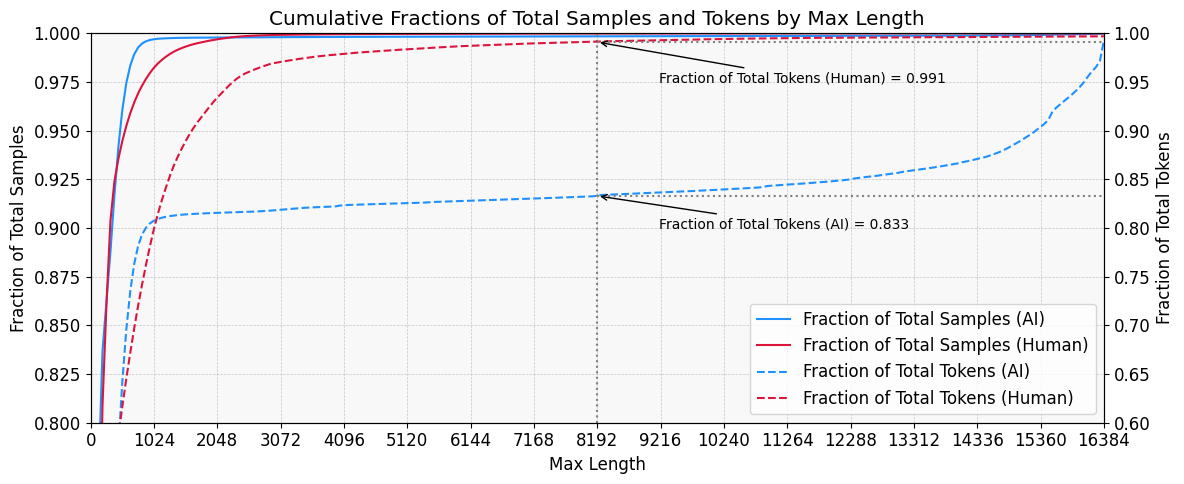

In [32]:
plt.rcParams.update({'font.size': 12})  # Better font size

fig, ax1 = plt.subplots(figsize=(12, 5))
ax1.set_facecolor('#f8f8f8')  # subtle background

# Plot cumulative fractions of total samples
ax1.plot(max_lens, frac1, label='Fraction of Total Samples (AI)', color='dodgerblue')
ax1.plot(max_lens, frac3, label='Fraction of Total Samples (Human)', color='crimson')
ax1.set_xlabel('Max Length')
ax1.set_ylabel('Fraction of Total Samples', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(0.8, 1)
ax1.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Second Y-axis for token fractions
ax2 = ax1.twinx()
ax2.plot(max_lens, frac2, label='Fraction of Total Tokens (AI)', color='dodgerblue', linestyle='--')
ax2.plot(max_lens, frac4, label='Fraction of Total Tokens (Human)', color='crimson', linestyle='--')
ax2.set_ylabel('Fraction of Total Tokens', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0.6, 1)

x_annot = 8192
ax1.axvline(x=x_annot, color='gray', linestyle=':', alpha=1)

ax2.hlines(y=0.833, xmin=8192, xmax=16384, color='gray', linestyle=':', alpha=1)
ax2.annotate('Fraction of Total Tokens (AI) = 0.833', xy=(x_annot, 0.833),
             xytext=(x_annot + 1000, 0.8),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10, color='black')

ax2.hlines(y=0.991, xmin=8192, xmax=16384, color='gray', linestyle=':', alpha=1)
ax2.annotate('Fraction of Total Tokens (Human) = 0.991', xy=(x_annot, 0.991),
             xytext=(x_annot + 1000, 0.95),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10, color='black')

# Title and legend
plt.title('Cumulative Fractions of Total Samples and Tokens by Max Length')
plt.xlim(0, 16384)
plt.xticks(np.arange(0, 2**14 + 1, step=1024), rotation=45)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
legend = plt.legend(lines1 + lines2, labels1 + labels2, loc='lower right')

plt.tight_layout()
plt.show()

In [10]:
for path in tqdm(paths):
    df = pd.read_csv(path)
    total_na = df.isna().sum().sum()
    col_na = df["dependency_distance"].isna().sum()
    print(col_na, col_na/len(df))
    if total_na !=col_na:
        t = input("There are {} NaN values in the dataframe, but only {} in the column 'dependency_distance'. Do you want to drop all NaN values? (y/n)".format(total_na, col_na))
        if t == "y":
            df["dependency_distance"] = df["dependency_distance"].fillna(0)
            df.to_csv(path, index=False)
    else:
        df["dependency_distance"] = df["dependency_distance"].fillna(0)
        df.to_csv(path, index=False)

  0%|          | 0/10 [00:00<?, ?it/s]

0 0.0


 10%|█         | 1/10 [00:02<00:23,  2.62s/it]

66 0.00011443810025817929


 20%|██        | 2/10 [00:25<01:55, 14.39s/it]

7 5.063510893782009e-05


 40%|████      | 4/10 [00:30<00:37,  6.27s/it]

0 0.0
0 0.0


 50%|█████     | 5/10 [00:42<00:41,  8.32s/it]

0 0.0


 60%|██████    | 6/10 [00:51<00:34,  8.55s/it]

0 0.0


 70%|███████   | 7/10 [01:04<00:30, 10.02s/it]

0 0.0


 80%|████████  | 8/10 [04:21<02:19, 69.52s/it]

0 0.0


 90%|█████████ | 9/10 [04:22<00:48, 48.07s/it]

1 1.5255902508680608e-06


100%|██████████| 10/10 [04:49<00:00, 28.95s/it]


In [11]:
for ds in ["blogs", "essays", "natural_questions", "nyt_articles", "nyt_comments", "raid", "reddit", "tweets", "writingprompts", "xsum"]:
    DATA_HUMAN_PATH = "../data/features/data_human"
    DATA_AI_PATH = f"../data/features/data_ai/{ds}"
    paths = get_csv_paths(DATA_AI_PATH, recursive=True)
    dff = pd.read_csv(f'../data/features/data_human/{ds.replace("_", "-")}_human_features.csv')
    df = pd.read_csv(f'../data/data_human/{ds.replace("_", "-")}_human.csv')
    dff["text"] = df["text"]
    for path in tqdm(paths):
        tmpf = pd.read_csv(path)
        total_na = tmpf.isna().sum().sum()
        col_na = tmpf["dependency_distance"].isna().sum()
        print(f"Total NA: {total_na}, Column NA: {col_na}, {col_na/len(tmpf)}")
        if total_na != col_na:
            t = input("Continue? (y/n): ")
            if t == "y":
                tmpf["dependency_distance"] = tmpf["dependency_distance"].fillna(0)
        else:
            tmpf["dependency_distance"] = tmpf["dependency_distance"].fillna(0)


        data_path = "../data/" + "/".join(path.split("/")[-3:]).replace("_features", "")
        tmp = pd.read_csv(data_path)
        tmpf["text"] = tmp["base_text"]
        tmpf = tmpf.merge(dff, on="text", how="left", suffixes=("", "_base"))
        tmpf.drop(columns=["text"], inplace=True)
        if len(tmp) != len(tmpf):
            print(f"Length mismatch for {path}: {len(tmp)} vs {len(tmpf)}")
            t = input("Continue? (y/n): ")
            if t == "y":
                tmpf.to_csv(path, index=False)
        else:
            tmpf.to_csv(path, index=False)

  0%|          | 0/21 [00:00<?, ?it/s]

Total NA: 2, Column NA: 2, 6.936977558877598e-05


  5%|▍         | 1/21 [00:05<01:45,  5.29s/it]

Total NA: 5, Column NA: 5, 0.00017339436815092245


 10%|▉         | 2/21 [00:09<01:32,  4.85s/it]

Total NA: 2, Column NA: 2, 6.935774726036899e-05


 14%|█▍        | 3/21 [00:14<01:24,  4.69s/it]

Total NA: 0, Column NA: 0, 0.0


 19%|█▉        | 4/21 [00:18<01:18,  4.60s/it]

Total NA: 0, Column NA: 0, 0.0


 24%|██▍       | 5/21 [00:23<01:12,  4.53s/it]

Total NA: 1, Column NA: 1, 3.468007629616785e-05


 29%|██▊       | 6/21 [00:27<01:08,  4.57s/it]

Total NA: 0, Column NA: 0, 0.0


 33%|███▎      | 7/21 [00:32<01:02,  4.45s/it]

Total NA: 1, Column NA: 1, 3.4678873630184493e-05


 38%|███▊      | 8/21 [00:36<00:59,  4.59s/it]

Total NA: 7, Column NA: 7, 0.00024275211541129144


 43%|████▎     | 9/21 [00:41<00:54,  4.52s/it]

Total NA: 0, Column NA: 0, 0.0


 48%|████▊     | 10/21 [00:45<00:48,  4.41s/it]

Total NA: 7, Column NA: 7, 0.00024275211541129144


 52%|█████▏    | 11/21 [00:49<00:43,  4.38s/it]

Total NA: 0, Column NA: 0, 0.0


 57%|█████▋    | 12/21 [00:53<00:38,  4.30s/it]

Total NA: 2, Column NA: 2, 6.935774726036899e-05


 62%|██████▏   | 13/21 [00:58<00:34,  4.29s/it]

Total NA: 0, Column NA: 0, 0.0


 67%|██████▋   | 14/21 [01:02<00:29,  4.26s/it]

Total NA: 7, Column NA: 7, 0.00024275211541129144


 71%|███████▏  | 15/21 [01:07<00:26,  4.43s/it]

Total NA: 9, Column NA: 9, 0.00031216399014949187


 76%|███████▌  | 16/21 [01:12<00:23,  4.61s/it]

Total NA: 6, Column NA: 6, 0.00020807324178110696


 81%|████████  | 17/21 [01:16<00:17,  4.48s/it]

Total NA: 2, Column NA: 2, 6.937218175511619e-05


 86%|████████▌ | 18/21 [01:21<00:14,  4.81s/it]

Total NA: 1, Column NA: 1, 3.4678873630184493e-05


 90%|█████████ | 19/21 [01:26<00:09,  4.75s/it]

Total NA: 0, Column NA: 0, 0.0


 95%|█████████▌| 20/21 [01:34<00:05,  5.78s/it]

Total NA: 3, Column NA: 3, 0.00010403662089055348


  0%|          | 0/21 [00:00<?, ?it/s]

Total NA: 0, Column NA: 0, 0.0


  5%|▍         | 1/21 [00:00<00:13,  1.50it/s]

Total NA: 0, Column NA: 0, 0.0


 10%|▉         | 2/21 [00:01<00:12,  1.52it/s]

Total NA: 0, Column NA: 0, 0.0


 14%|█▍        | 3/21 [00:01<00:11,  1.56it/s]

Total NA: 0, Column NA: 0, 0.0


 19%|█▉        | 4/21 [00:02<00:11,  1.52it/s]

Total NA: 0, Column NA: 0, 0.0


 24%|██▍       | 5/21 [00:03<00:11,  1.45it/s]

Total NA: 0, Column NA: 0, 0.0


 29%|██▊       | 6/21 [00:03<00:09,  1.51it/s]

Total NA: 0, Column NA: 0, 0.0


 33%|███▎      | 7/21 [00:04<00:09,  1.45it/s]

Total NA: 0, Column NA: 0, 0.0


 38%|███▊      | 8/21 [00:05<00:08,  1.49it/s]

Total NA: 0, Column NA: 0, 0.0


 43%|████▎     | 9/21 [00:05<00:07,  1.56it/s]

Total NA: 0, Column NA: 0, 0.0


 48%|████▊     | 10/21 [00:06<00:07,  1.55it/s]

Total NA: 0, Column NA: 0, 0.0


 52%|█████▏    | 11/21 [00:07<00:06,  1.55it/s]

Total NA: 0, Column NA: 0, 0.0


 57%|█████▋    | 12/21 [00:07<00:05,  1.56it/s]

Total NA: 0, Column NA: 0, 0.0


 62%|██████▏   | 13/21 [00:08<00:05,  1.49it/s]

Total NA: 0, Column NA: 0, 0.0


 67%|██████▋   | 14/21 [00:09<00:05,  1.20it/s]

Total NA: 0, Column NA: 0, 0.0


 71%|███████▏  | 15/21 [00:10<00:05,  1.14it/s]

Total NA: 0, Column NA: 0, 0.0


 76%|███████▌  | 16/21 [00:12<00:05,  1.04s/it]

Total NA: 0, Column NA: 0, 0.0


 81%|████████  | 17/21 [00:13<00:05,  1.26s/it]

Total NA: 0, Column NA: 0, 0.0


 86%|████████▌ | 18/21 [00:16<00:04,  1.60s/it]

Total NA: 0, Column NA: 0, 0.0


 90%|█████████ | 19/21 [00:18<00:03,  1.78s/it]

Total NA: 0, Column NA: 0, 0.0


 95%|█████████▌| 20/21 [00:20<00:01,  1.82s/it]

Total NA: 0, Column NA: 0, 0.0


  0%|          | 0/21 [00:00<?, ?it/s]

Total NA: 264, Column NA: 264, 0.02279595889819532


  5%|▍         | 1/21 [00:24<08:03, 24.17s/it]

Total NA: 505, Column NA: 505, 0.043609671848013815


 10%|▉         | 2/21 [00:36<05:28, 17.29s/it]

Total NA: 1640, Column NA: 1640, 0.14168466522678186


 14%|█▍        | 3/21 [00:46<04:06, 13.71s/it]

Total NA: 568, Column NA: 568, 0.04904585096278387


 19%|█▉        | 4/21 [00:57<03:38, 12.88s/it]

Total NA: 105, Column NA: 105, 0.00906657456178223


 24%|██▍       | 5/21 [01:09<03:18, 12.38s/it]

Total NA: 264, Column NA: 264, 0.022797927461139896


 29%|██▊       | 6/21 [01:21<03:04, 12.30s/it]

Total NA: 14, Column NA: 14, 0.0012090854132481216


 33%|███▎      | 7/21 [01:34<02:55, 12.54s/it]

Total NA: 739, Column NA: 739, 0.06381692573402419


 38%|███▊      | 8/21 [02:13<04:31, 20.91s/it]

Total NA: 996, Column NA: 996, 0.08601779082822351


 43%|████▎     | 9/21 [02:34<04:12, 21.01s/it]

Total NA: 2, Column NA: 2, 0.00018170255292086854


 48%|████▊     | 10/21 [02:44<03:14, 17.67s/it]

Total NA: 667, Column NA: 667, 0.0575993091537133


 52%|█████▏    | 11/21 [03:11<03:23, 20.35s/it]

Total NA: 820, Column NA: 820, 0.07080562991106122


 57%|█████▋    | 12/21 [03:20<02:32, 16.93s/it]

Total NA: 361, Column NA: 361, 0.031174438687392055


 62%|██████▏   | 13/21 [03:33<02:06, 15.80s/it]

Total NA: 17, Column NA: 17, 0.0014689363172902445


 67%|██████▋   | 14/21 [03:44<01:40, 14.34s/it]

Total NA: 376, Column NA: 376, 0.03246697176409637


 71%|███████▏  | 15/21 [03:54<01:18, 13.10s/it]

Total NA: 81, Column NA: 81, 0.006995422748078418


 76%|███████▌  | 16/21 [04:02<00:58, 11.69s/it]

Total NA: 942, Column NA: 942, 0.08134012606856057


 81%|████████  | 17/21 [04:11<00:43, 10.79s/it]

Total NA: 913, Column NA: 913, 0.07884283246977547


 86%|████████▌ | 18/21 [04:19<00:30, 10.04s/it]

Total NA: 568, Column NA: 568, 0.04905432248035236


 90%|█████████ | 19/21 [04:30<00:20, 10.09s/it]

Total NA: 36, Column NA: 36, 0.0031085398497539074


 95%|█████████▌| 20/21 [04:38<00:09,  9.71s/it]

Total NA: 720, Column NA: 720, 0.062170796995078145


  0%|          | 0/21 [00:00<?, ?it/s]

Total NA: 0, Column NA: 0, 0.0


  5%|▍         | 1/21 [00:01<00:31,  1.58s/it]

Total NA: 0, Column NA: 0, 0.0


 10%|▉         | 2/21 [00:03<00:29,  1.53s/it]

Total NA: 0, Column NA: 0, 0.0


 14%|█▍        | 3/21 [00:04<00:27,  1.52s/it]

Total NA: 0, Column NA: 0, 0.0


 19%|█▉        | 4/21 [00:06<00:25,  1.50s/it]

Total NA: 0, Column NA: 0, 0.0


 24%|██▍       | 5/21 [00:07<00:23,  1.47s/it]

Total NA: 0, Column NA: 0, 0.0


 29%|██▊       | 6/21 [00:08<00:21,  1.46s/it]

Total NA: 0, Column NA: 0, 0.0


 33%|███▎      | 7/21 [00:10<00:20,  1.46s/it]

Total NA: 0, Column NA: 0, 0.0


 38%|███▊      | 8/21 [00:11<00:18,  1.46s/it]

Total NA: 0, Column NA: 0, 0.0


 43%|████▎     | 9/21 [00:14<00:21,  1.82s/it]

Total NA: 0, Column NA: 0, 0.0


 48%|████▊     | 10/21 [00:16<00:19,  1.77s/it]

Total NA: 0, Column NA: 0, 0.0


 52%|█████▏    | 11/21 [00:17<00:17,  1.76s/it]

Total NA: 0, Column NA: 0, 0.0


 57%|█████▋    | 12/21 [00:19<00:16,  1.78s/it]

Total NA: 0, Column NA: 0, 0.0


 62%|██████▏   | 13/21 [00:21<00:14,  1.80s/it]

Total NA: 0, Column NA: 0, 0.0


 67%|██████▋   | 14/21 [00:24<00:14,  2.11s/it]

Total NA: 0, Column NA: 0, 0.0


 71%|███████▏  | 15/21 [00:27<00:15,  2.51s/it]

Total NA: 0, Column NA: 0, 0.0


 76%|███████▌  | 16/21 [00:29<00:11,  2.28s/it]

Total NA: 0, Column NA: 0, 0.0


 81%|████████  | 17/21 [00:31<00:08,  2.16s/it]

Total NA: 0, Column NA: 0, 0.0


 86%|████████▌ | 18/21 [00:33<00:06,  2.12s/it]

Total NA: 0, Column NA: 0, 0.0


 90%|█████████ | 19/21 [00:35<00:04,  2.01s/it]

Total NA: 0, Column NA: 0, 0.0


 95%|█████████▌| 20/21 [00:37<00:02,  2.21s/it]

Total NA: 0, Column NA: 0, 0.0


  0%|          | 0/21 [00:00<?, ?it/s]

Total NA: 0, Column NA: 0, 0.0


  5%|▍         | 1/21 [01:34<31:30, 94.55s/it]

Total NA: 6, Column NA: 6, 2.8414472437961737e-05


 10%|▉         | 2/21 [02:23<21:28, 67.80s/it]

Total NA: 4, Column NA: 4, 1.8942981625307822e-05


 14%|█▍        | 3/21 [03:08<17:12, 57.34s/it]

Total NA: 51, Column NA: 51, 0.00024152301572267476


 19%|█▉        | 4/21 [04:13<17:03, 60.21s/it]

Total NA: 0, Column NA: 0, 0.0


 24%|██▍       | 5/21 [05:41<18:44, 70.28s/it]

Total NA: 33, Column NA: 33, 0.00015628551943623552


 29%|██▊       | 6/21 [06:47<17:13, 68.88s/it]

Total NA: 0, Column NA: 0, 0.0


 33%|███▎      | 7/21 [07:23<13:35, 58.28s/it]

Total NA: 0, Column NA: 0, 0.0


 38%|███▊      | 8/21 [08:07<11:38, 53.74s/it]

Total NA: 1, Column NA: 1, 4.7357454063269556e-06


 43%|████▎     | 9/21 [08:48<09:54, 49.52s/it]

Total NA: 0, Column NA: 0, 0.0


 48%|████▊     | 10/21 [09:50<09:46, 53.34s/it]

Total NA: 2, Column NA: 2, 9.471490812653911e-06


 52%|█████▏    | 11/21 [10:38<08:38, 51.86s/it]

Total NA: 13, Column NA: 13, 6.156469028225042e-05


 57%|█████▋    | 12/21 [11:32<07:52, 52.47s/it]

Total NA: 0, Column NA: 0, 0.0


 62%|██████▏   | 13/21 [12:11<06:28, 48.51s/it]

Total NA: 9, Column NA: 9, 4.26217086569426e-05


 67%|██████▋   | 14/21 [12:59<05:37, 48.19s/it]

Total NA: 3, Column NA: 3, 1.4207236218980868e-05


 71%|███████▏  | 15/21 [13:34<04:25, 44.32s/it]

Total NA: 1467, Column NA: 1467, 0.006947338511081644


 76%|███████▌  | 16/21 [14:35<04:06, 49.28s/it]

Total NA: 0, Column NA: 0, 0.0


 81%|████████  | 17/21 [16:08<04:10, 62.55s/it]

Total NA: 2, Column NA: 2, 9.471490812653911e-06


 86%|████████▌ | 18/21 [16:52<02:51, 57.03s/it]

Total NA: 1, Column NA: 1, 4.7357454063269556e-06


 90%|█████████ | 19/21 [17:29<01:41, 50.94s/it]

Total NA: 22, Column NA: 22, 0.00010418639893919302


 95%|█████████▌| 20/21 [18:12<00:48, 48.53s/it]

Total NA: 0, Column NA: 0, 0.0


  0%|          | 0/21 [00:00<?, ?it/s]

Total NA: 0, Column NA: 0, 0.0


  5%|▍         | 1/21 [00:05<01:48,  5.43s/it]

Total NA: 0, Column NA: 0, 0.0


 10%|▉         | 2/21 [00:10<01:43,  5.43s/it]

Total NA: 0, Column NA: 0, 0.0


 14%|█▍        | 3/21 [00:16<01:40,  5.58s/it]

Total NA: 0, Column NA: 0, 0.0


 19%|█▉        | 4/21 [00:21<01:31,  5.36s/it]

Total NA: 0, Column NA: 0, 0.0


 24%|██▍       | 5/21 [00:26<01:22,  5.19s/it]

Total NA: 0, Column NA: 0, 0.0


 29%|██▊       | 6/21 [00:31<01:14,  4.96s/it]

Total NA: 0, Column NA: 0, 0.0


 33%|███▎      | 7/21 [00:36<01:10,  5.03s/it]

Total NA: 0, Column NA: 0, 0.0


 38%|███▊      | 8/21 [00:42<01:09,  5.34s/it]

Total NA: 0, Column NA: 0, 0.0


 43%|████▎     | 9/21 [00:49<01:09,  5.79s/it]

Total NA: 0, Column NA: 0, 0.0


 48%|████▊     | 10/21 [00:55<01:07,  6.10s/it]

Total NA: 0, Column NA: 0, 0.0


 52%|█████▏    | 11/21 [01:02<01:03,  6.37s/it]

Total NA: 1, Column NA: 1, 2.893434796446862e-05


 57%|█████▋    | 12/21 [01:10<01:01,  6.81s/it]

Total NA: 0, Column NA: 0, 0.0


 62%|██████▏   | 13/21 [01:19<00:58,  7.37s/it]

Total NA: 0, Column NA: 0, 0.0


 67%|██████▋   | 14/21 [01:27<00:53,  7.66s/it]

Total NA: 0, Column NA: 0, 0.0


 71%|███████▏  | 15/21 [01:32<00:40,  6.76s/it]

Total NA: 0, Column NA: 0, 0.0


 76%|███████▌  | 16/21 [01:37<00:32,  6.41s/it]

Total NA: 0, Column NA: 0, 0.0


 81%|████████  | 17/21 [01:45<00:27,  6.90s/it]

Total NA: 0, Column NA: 0, 0.0


 86%|████████▌ | 18/21 [01:52<00:20,  6.80s/it]

Total NA: 0, Column NA: 0, 0.0


 90%|█████████ | 19/21 [02:03<00:15,  7.97s/it]

Total NA: 0, Column NA: 0, 0.0


 95%|█████████▌| 20/21 [02:15<00:09,  9.33s/it]

Total NA: 0, Column NA: 0, 0.0


  0%|          | 0/21 [00:00<?, ?it/s]

Total NA: 47, Column NA: 47, 0.0003585158967474217


  5%|▍         | 1/21 [00:18<06:14, 18.73s/it]

Total NA: 6, Column NA: 6, 4.57679868188198e-05


 10%|▉         | 2/21 [00:38<06:06, 19.31s/it]

Total NA: 1, Column NA: 1, 7.627997803136633e-06


 14%|█▍        | 3/21 [01:21<09:05, 30.31s/it]

Total NA: 0, Column NA: 0, 0.0


 19%|█▉        | 4/21 [01:40<07:14, 25.56s/it]

Total NA: 1, Column NA: 1, 7.627997803136633e-06


 24%|██▍       | 5/21 [02:02<06:32, 24.53s/it]

Total NA: 15, Column NA: 15, 0.00011441996704704948


 29%|██▊       | 6/21 [02:30<06:22, 25.50s/it]

Total NA: 6, Column NA: 6, 4.57679868188198e-05


 33%|███▎      | 7/21 [02:55<05:57, 25.56s/it]

Total NA: 3, Column NA: 3, 2.28839934094099e-05


 38%|███▊      | 8/21 [03:14<05:05, 23.49s/it]

Total NA: 2, Column NA: 2, 1.5255995606273265e-05


 43%|████▎     | 9/21 [03:42<04:57, 24.83s/it]

Total NA: 15, Column NA: 15, 0.00011460880195599022


 48%|████▊     | 10/21 [03:58<04:04, 22.19s/it]

Total NA: 8, Column NA: 8, 6.102398242509306e-05


 52%|█████▏    | 11/21 [04:13<03:18, 19.84s/it]

Total NA: 35, Column NA: 35, 0.00026697992310978217


 57%|█████▋    | 12/21 [04:28<02:46, 18.48s/it]

Total NA: 2, Column NA: 2, 1.5255995606273265e-05


 62%|██████▏   | 13/21 [04:45<02:22, 17.85s/it]

Total NA: 0, Column NA: 0, 0.0


 67%|██████▋   | 14/21 [05:03<02:04, 17.82s/it]

Total NA: 6, Column NA: 6, 4.57679868188198e-05


 71%|███████▏  | 15/21 [05:17<01:41, 16.84s/it]

Total NA: 1, Column NA: 1, 7.627997803136633e-06


 76%|███████▌  | 16/21 [05:32<01:20, 16.13s/it]

Total NA: 1, Column NA: 1, 7.627997803136633e-06


 81%|████████  | 17/21 [05:48<01:05, 16.34s/it]

Total NA: 9, Column NA: 9, 6.86519802282297e-05


 86%|████████▌ | 18/21 [06:03<00:47, 15.69s/it]

Total NA: 10, Column NA: 10, 7.627997803136632e-05


 90%|█████████ | 19/21 [06:17<00:30, 15.20s/it]

Total NA: 33, Column NA: 33, 0.0002517373692682071


 95%|█████████▌| 20/21 [06:33<00:15, 15.46s/it]

Total NA: 4, Column NA: 4, 3.051199121254653e-05


  0%|          | 0/21 [00:00<?, ?it/s]

Total NA: 2, Column NA: 2, 1.2823307643973687e-05


  5%|▍         | 1/21 [00:15<05:01, 15.06s/it]

Total NA: 3, Column NA: 3, 1.923496146596053e-05


 10%|▉         | 2/21 [00:43<07:19, 23.15s/it]

Total NA: 0, Column NA: 0, 0.0


 14%|█▍        | 3/21 [01:03<06:27, 21.55s/it]

Total NA: 2, Column NA: 2, 1.2823307643973687e-05


 19%|█▉        | 4/21 [01:47<08:38, 30.53s/it]

Total NA: 0, Column NA: 0, 0.0


 24%|██▍       | 5/21 [02:07<07:07, 26.74s/it]

Total NA: 1, Column NA: 1, 6.411653821986843e-06


 29%|██▊       | 6/21 [02:29<06:17, 25.17s/it]

Total NA: 0, Column NA: 0, 0.0


 33%|███▎      | 7/21 [03:11<07:07, 30.50s/it]

Total NA: 0, Column NA: 0, 0.0


 38%|███▊      | 8/21 [03:30<05:50, 26.96s/it]

Total NA: 0, Column NA: 0, 0.0


 43%|████▎     | 9/21 [03:48<04:49, 24.16s/it]

Total NA: 1, Column NA: 1, 6.411653821986843e-06


 48%|████▊     | 10/21 [04:04<03:57, 21.57s/it]

Total NA: 13, Column NA: 13, 8.335149968582896e-05


 52%|█████▏    | 11/21 [04:19<03:15, 19.57s/it]

Total NA: 1, Column NA: 1, 6.411653821986843e-06


 57%|█████▋    | 12/21 [04:34<02:42, 18.01s/it]

Total NA: 3, Column NA: 3, 1.923496146596053e-05


 62%|██████▏   | 13/21 [04:49<02:17, 17.20s/it]

Total NA: 1, Column NA: 1, 6.411653821986843e-06


 67%|██████▋   | 14/21 [05:04<01:55, 16.49s/it]

Total NA: 2, Column NA: 2, 1.2823307643973687e-05


 71%|███████▏  | 15/21 [05:19<01:37, 16.27s/it]

Total NA: 3, Column NA: 3, 1.923496146596053e-05


 76%|███████▌  | 16/21 [05:36<01:20, 16.19s/it]

Total NA: 1, Column NA: 1, 6.411653821986843e-06


 81%|████████  | 17/21 [05:51<01:04, 16.12s/it]

Total NA: 2, Column NA: 2, 1.2823307643973687e-05


 86%|████████▌ | 18/21 [06:06<00:47, 15.79s/it]

Total NA: 0, Column NA: 0, 0.0


 90%|█████████ | 19/21 [06:20<00:30, 15.19s/it]

Total NA: 2, Column NA: 2, 1.2823307643973687e-05


 95%|█████████▌| 20/21 [06:35<00:15, 15.02s/it]

Total NA: 0, Column NA: 0, 0.0


  0%|          | 0/21 [00:00<?, ?it/s]

Total NA: 0, Column NA: 0, 0.0


  5%|▍         | 1/21 [00:04<01:24,  4.22s/it]

Total NA: 0, Column NA: 0, 0.0


 10%|▉         | 2/21 [00:07<01:08,  3.58s/it]

Total NA: 0, Column NA: 0, 0.0


 14%|█▍        | 3/21 [00:10<00:56,  3.16s/it]

Total NA: 0, Column NA: 0, 0.0


 19%|█▉        | 4/21 [00:12<00:51,  3.05s/it]

Total NA: 0, Column NA: 0, 0.0


 24%|██▍       | 5/21 [00:15<00:46,  2.94s/it]

Total NA: 0, Column NA: 0, 0.0


 29%|██▊       | 6/21 [00:18<00:41,  2.78s/it]

Total NA: 0, Column NA: 0, 0.0


 33%|███▎      | 7/21 [00:20<00:38,  2.73s/it]

Total NA: 0, Column NA: 0, 0.0


 38%|███▊      | 8/21 [00:23<00:34,  2.64s/it]

Total NA: 0, Column NA: 0, 0.0


 43%|████▎     | 9/21 [00:26<00:32,  2.70s/it]

Total NA: 0, Column NA: 0, 0.0


 48%|████▊     | 10/21 [00:29<00:33,  3.07s/it]

Total NA: 0, Column NA: 0, 0.0


 52%|█████▏    | 11/21 [00:34<00:34,  3.47s/it]

Total NA: 0, Column NA: 0, 0.0


 57%|█████▋    | 12/21 [00:38<00:34,  3.84s/it]

Total NA: 0, Column NA: 0, 0.0


 62%|██████▏   | 13/21 [00:42<00:30,  3.86s/it]

Total NA: 0, Column NA: 0, 0.0


 67%|██████▋   | 14/21 [00:46<00:27,  3.93s/it]

Total NA: 0, Column NA: 0, 0.0


 71%|███████▏  | 15/21 [00:50<00:23,  3.89s/it]

Total NA: 0, Column NA: 0, 0.0


 76%|███████▌  | 16/21 [00:54<00:19,  3.85s/it]

Total NA: 0, Column NA: 0, 0.0


 81%|████████  | 17/21 [00:57<00:14,  3.69s/it]

Total NA: 0, Column NA: 0, 0.0


 86%|████████▌ | 18/21 [01:01<00:11,  3.73s/it]

Total NA: 0, Column NA: 0, 0.0


 90%|█████████ | 19/21 [01:05<00:07,  3.68s/it]

Total NA: 0, Column NA: 0, 0.0


 95%|█████████▌| 20/21 [01:09<00:03,  3.75s/it]

Total NA: 0, Column NA: 0, 0.0


  0%|          | 0/21 [00:00<?, ?it/s]

Total NA: 0, Column NA: 0, 0.0


  5%|▍         | 1/21 [00:08<02:40,  8.04s/it]

Total NA: 0, Column NA: 0, 0.0


 10%|▉         | 2/21 [00:15<02:25,  7.68s/it]

Total NA: 0, Column NA: 0, 0.0


 14%|█▍        | 3/21 [00:22<02:14,  7.46s/it]

Total NA: 0, Column NA: 0, 0.0


 19%|█▉        | 4/21 [00:31<02:15,  7.97s/it]

Total NA: 0, Column NA: 0, 0.0


 24%|██▍       | 5/21 [00:40<02:13,  8.34s/it]

Total NA: 0, Column NA: 0, 0.0


 29%|██▊       | 6/21 [00:46<01:55,  7.68s/it]

Total NA: 0, Column NA: 0, 0.0


 33%|███▎      | 7/21 [00:53<01:43,  7.40s/it]

Total NA: 0, Column NA: 0, 0.0


 38%|███▊      | 8/21 [01:01<01:39,  7.66s/it]

Total NA: 0, Column NA: 0, 0.0


 43%|████▎     | 9/21 [01:09<01:31,  7.60s/it]

Total NA: 0, Column NA: 0, 0.0


 48%|████▊     | 10/21 [01:17<01:25,  7.82s/it]

Total NA: 0, Column NA: 0, 0.0


 52%|█████▏    | 11/21 [01:24<01:15,  7.53s/it]

Total NA: 0, Column NA: 0, 0.0


 57%|█████▋    | 12/21 [01:31<01:07,  7.48s/it]

Total NA: 0, Column NA: 0, 0.0


 62%|██████▏   | 13/21 [01:40<01:02,  7.78s/it]

Total NA: 0, Column NA: 0, 0.0


 67%|██████▋   | 14/21 [01:46<00:51,  7.35s/it]

Total NA: 0, Column NA: 0, 0.0


 71%|███████▏  | 15/21 [01:55<00:46,  7.69s/it]

Total NA: 0, Column NA: 0, 0.0


 76%|███████▌  | 16/21 [02:02<00:38,  7.66s/it]

Total NA: 0, Column NA: 0, 0.0


 81%|████████  | 17/21 [02:11<00:32,  8.08s/it]

Total NA: 0, Column NA: 0, 0.0


 86%|████████▌ | 18/21 [02:19<00:23,  7.91s/it]

Total NA: 0, Column NA: 0, 0.0


 90%|█████████ | 19/21 [02:26<00:15,  7.70s/it]

Total NA: 0, Column NA: 0, 0.0


 95%|█████████▌| 20/21 [02:32<00:07,  7.25s/it]

Total NA: 0, Column NA: 0, 0.0


100%|██████████| 21/21 [02:38<00:00,  7.56s/it]
